In [1]:
# Import libraries
import importlib
import os
import string
from collections import Counter
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np
import json
import torch
# import torch.nn as nn
# import torch.nn.utils.rnn as rnn_utils
# import torch.optim as optim
# import torchvision
# from torch.utils.data import DataLoader
# from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [2]:
# Check GPU
if not torch.cuda.is_available():
    raise RuntimeError("GPU with CUDA support is required")
device = torch.device("cuda")

In [3]:
# Import utils
if not os.path.exists("./utils"):
    !git clone https://github.com/ZhangShaozuo/Artificial_Intelligence_VQA.git
    !ln -s ./DL-BigProject-VQA/utils ./utils

if os.path.exists("./DL-BigProject-VQA/utils"):
    !cd ./DL-BigProject-VQA/utils && git pull

import utils.data as data_util
import utils.helper as helper
import utils.train as train_util
from utils.vocab import Vocab

importlib.reload(data_util)
importlib.reload(helper)
importlib.reload(train_util)
pass

In [4]:
question_vocab = Vocab.load("question_vocab.json")
answer_vocab = Vocab.load("answer_vocab.json")

In [5]:
# Load dataset (single word answer only)
image_transform = transforms.Compose(
    [
        transforms.Resize(int(224 / 0.875)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

answer_vocab = Vocab({})


def answer_tansform(answer: str):
    return answer_vocab[answer]


def answer_tansform_factory(corpus: Iterable[str]):
    global answer_vocab
    answer_vocab = Vocab(Counter(corpus), specials=["<unk>"], min_freq=10)
    return answer_tansform


train_dataset = data_util.VQA2Dataset(
    "./VQA2/",
    group="train",
    image_transform=image_transform,
    answer_transform_factory=answer_tansform_factory,
    download=True,
)

valid_dataset = data_util.VQA2Dataset(
    "./VQA2/",
    group="val",
    image_transform=image_transform,
    answer_transform=answer_tansform,
)

test_dataset = data_util.VQA2Dataset(
    "./VQA2/",
    group="test",
    image_transform=image_transform,
    answer_transform=answer_tansform,
)

print("train_dataset:", len(train_dataset))
print("valid_dataset:", len(valid_dataset))
print("test_dataset:", len(test_dataset))
print("answer_vocab size: ", len(answer_vocab))

train_dataset: 411198
valid_dataset: 138617
test_dataset: 59678
answer_vocab size:  1823


In [24]:
len(question_vocab)

13457

In [6]:
img,qn,an=train_dataset[0] 
qn

'What is this photo taken looking through?'

In [7]:
train_dataset.info

{'number': 56133, 'yes/no': 166881, 'other': 188184}

In [8]:
valid_dataset.info

{'number': 19124, 'yes/no': 56048, 'other': 63445}

In [9]:
test_dataset.info

{'number': 8233, 'yes/no': 24492, 'other': 26953}

In [10]:
def visualize(data_vis, transpose = False):
    labels = ["train","valid","test"]
    xticks = ["number","yes/no","other"]
    if transpose:
        labels = ["number","yes/no","other"]
        data_vis = np.array(data_vis).transpose()
        xticks = ["train","valid","test"]
    X = np.arange(3)
    fig = plt.figure(figsize = (8,6))
    fig.suptitle("Class distribution")
    ax = fig.add_subplot()
    fig.subplots_adjust(top=0.9)
    ax.bar(X+0.00, data_vis[0], color = "b", width = 0.25, label = labels[0])
    ax.bar(X+0.25, data_vis[1], color = "g", width = 0.25, label = labels[1])
    ax.bar(X+0.50, data_vis[2], color = "r", width = 0.25, label = labels[2])
    plt.xlabel("single-word answer type", fontweight = 'normal', fontsize = '12', horizontalalignment = "center", x=0.8)
    plt.ylabel("number of samples", fontweight = 'normal', fontsize = '12', horizontalalignment = "center", y=0.8)
    plt.xticks(X+0.25, xticks)
    plt.legend()
    # for i in range(9):
    for i in range(3):
        for j in range(3):
            ax.text(-0.125+0.25*j+1*i,data_vis[j][i]+4000, data_vis[j][i])


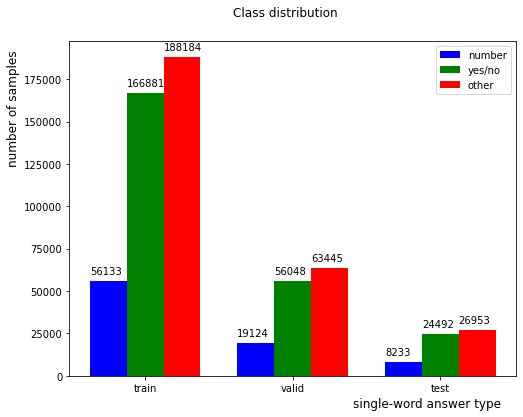

In [11]:
data_vis = []
data_vis.append(list(train_dataset.info.values()))
data_vis.append(list(valid_dataset.info.values()))
data_vis.append(list(test_dataset.info.values()))

visualize(data_vis, transpose = True)

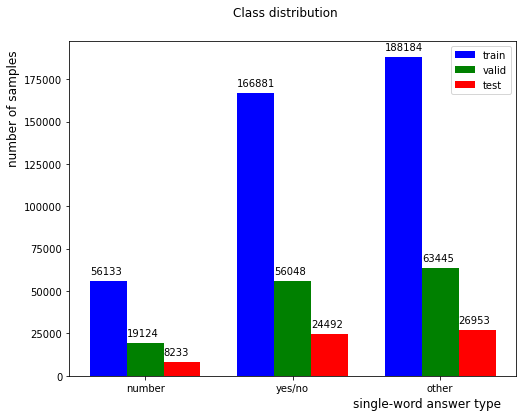

In [12]:
visualize(data_vis)

In [20]:
def topk_frequent_words(statics,group, k=50):
    v2k = {v:k for k,v in statics.items()}
    values = list(statics.values())
    values.sort()
    values.reverse()
    xticks = [v2k[v] for v in values[:k]]
    X = np.arange(k)
    fig = plt.figure(figsize = (80,60))
    fig.suptitle(f"Top {k} most frequent words in {group} dataset", fontsize = 80)
    ax = fig.add_subplot()
    fig.subplots_adjust(top=1)
    colormap = {"train":"b","val":"g","test":"r"}
    ax.bar(X+0.00, values[:k], color = colormap[group], width = 0.5)
#     ax.bar(X+0.5, values[:k])
    plt.xlabel("word", fontweight = 'normal', horizontalalignment = "center", x=0.9, fontsize = 80)
    plt.ylabel("occurence time", fontweight = 'normal', horizontalalignment = "center", y=0.9, fontsize = 80)
    plt.xticks(X, xticks, fontsize = 50, rotation = "vertical")
    plt.yticks(fontsize = 50)
    plt.grid()
#     for i in range(k):
#         ax.text(-0.225+i, values[i]+2000, values[i], fontsize = 50)

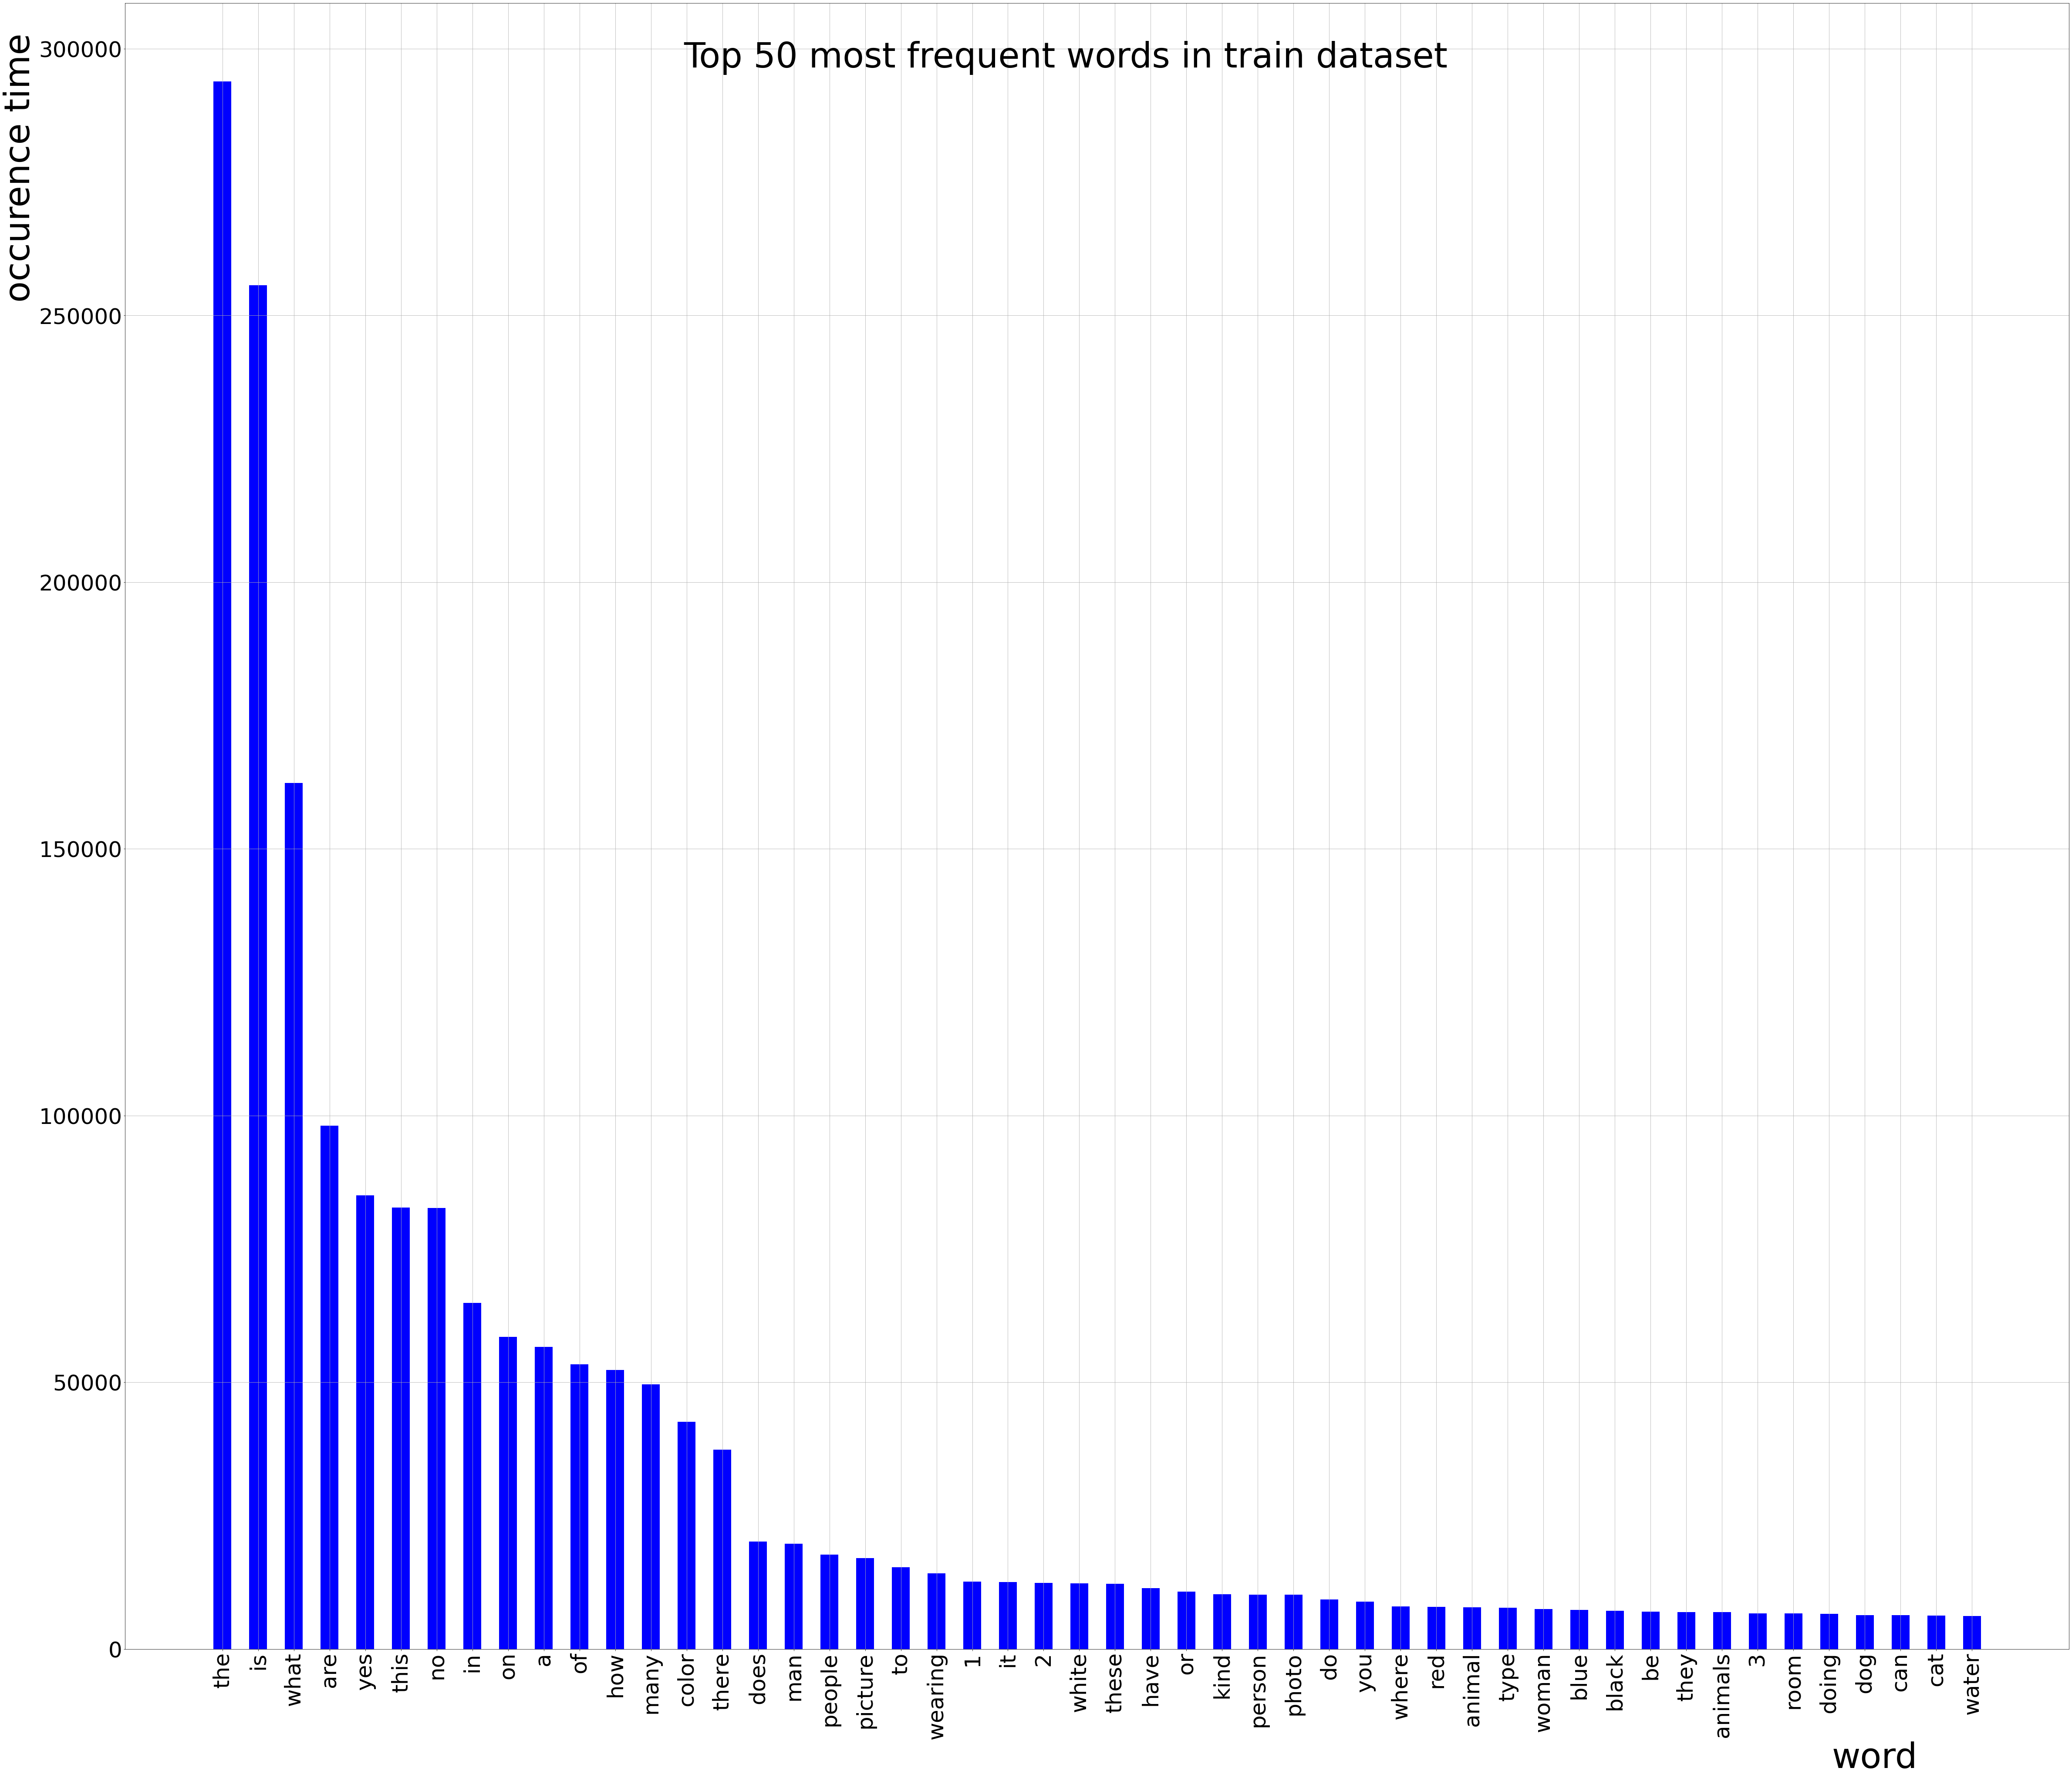

In [21]:
topk_frequent_words(train_dataset.statics, train_dataset.group, 50)

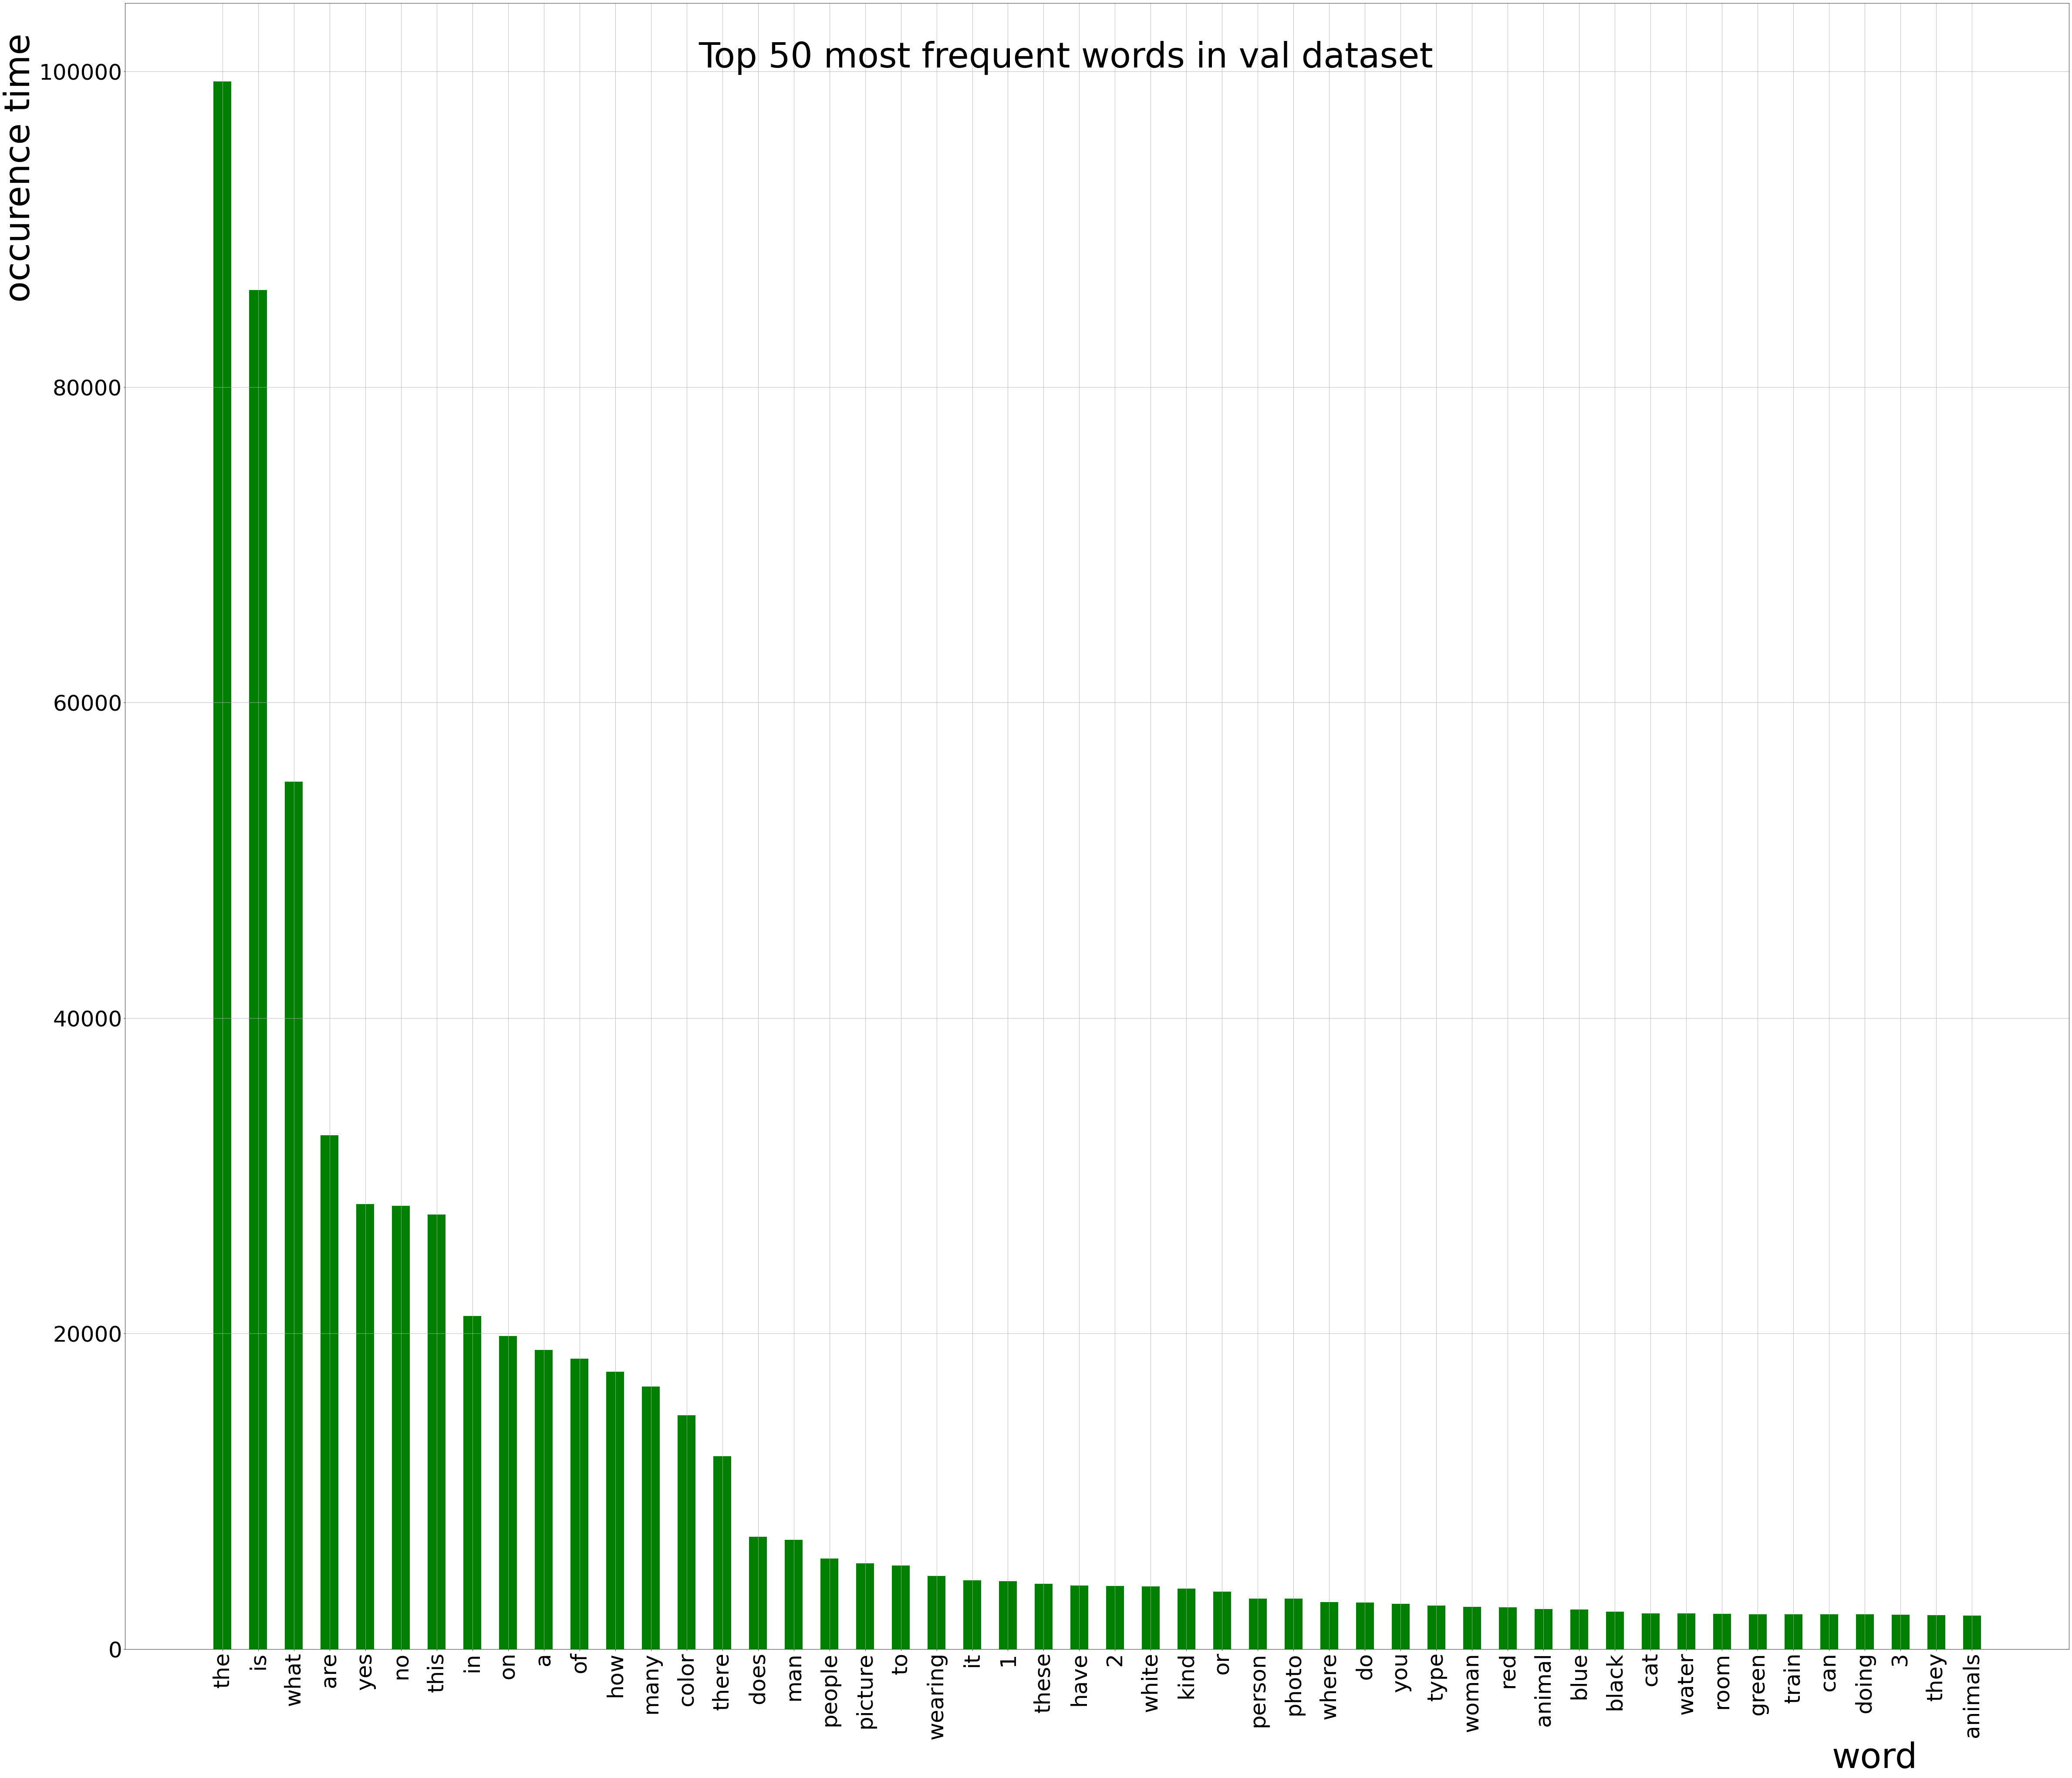

In [22]:
topk_frequent_words(valid_dataset.statics, valid_dataset.group, 50)

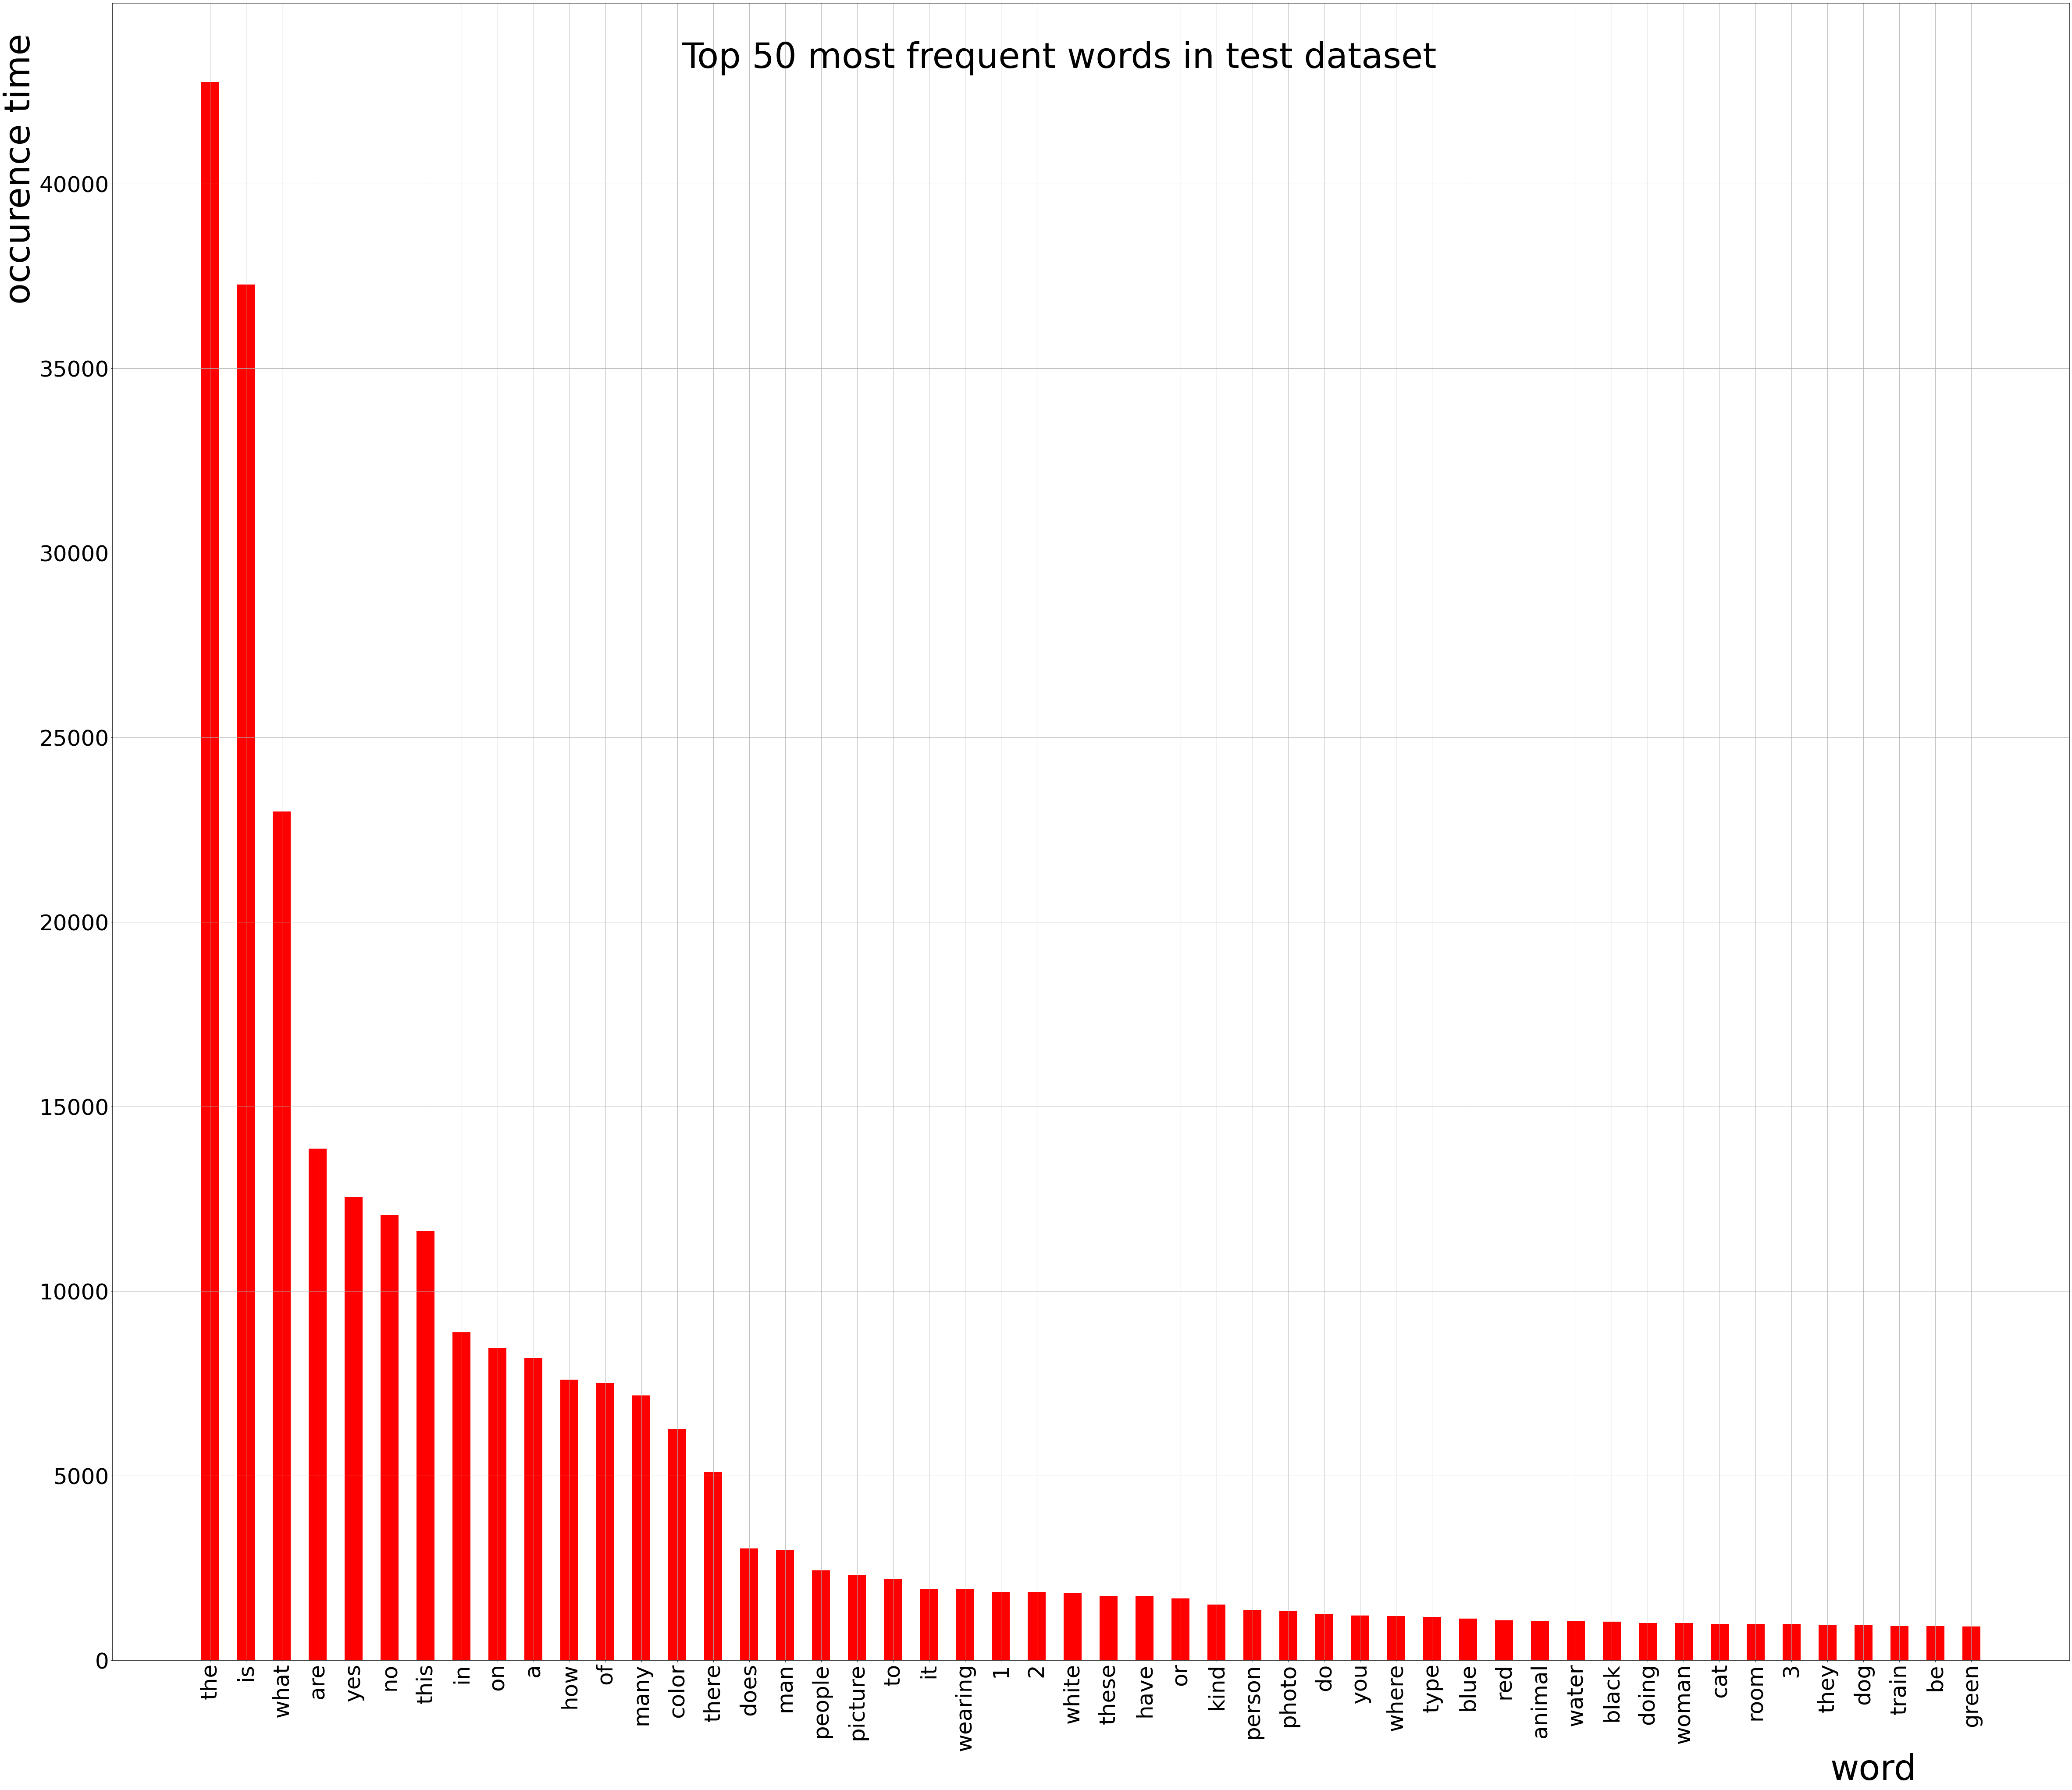

In [23]:
topk_frequent_words(test_dataset.statics, test_dataset.group, 50)